## Wrangle and Analyze Data

### <a name="contents"> Contents </a>

#### 1. <a href="#target"> Target of this Project </a>
#### 2. <a href="#detail"> Project Details </a>
#### 3. <a href="#gather"> Gathering Data </a>
##### &nbsp;&nbsp;&nbsp; 3.1<a href="#predictions"> The tweet image predictions </a>
##### &nbsp;&nbsp;&nbsp; 3.2<a href="#JSON"> Store Tweets JSON Data </a>
#### 4. <a href="#assess"> Assessing Data </a>
##### &nbsp;&nbsp;&nbsp; 4.1<a href="#archive"> WeRateDogs Twitter achive data (archive) </a>
##### &nbsp;&nbsp;&nbsp; 4.2<a href="#images"> The Tweet Image Predictions data (images) </a>
##### &nbsp;&nbsp;&nbsp; 4.3<a href="#popularity"> Downloaded Tweets data (popularity) </a>
#### 5. <a href="#clean"> Cleaning data </a>
#### 6.<a href="#data"> Storing,Analyzing and Visualizing data </a>
#### 7.<a href="#ref"> References </a>

### <a name="target"> Target of this Project </a>
 Wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations.

### <a name="detail"> Project Details </a>
 The dataset that was wrangled, analyzed and visualized is the tweet archive of Twitter user [@dog_rates](https://twitter.com/dog_rates), also known as [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs). WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog.


### <a name="gather"> Gathering Data </a>

In [91]:
# required models
import pandas as pd
import numpy as np
import requests
import io
import tweepy
import time
import json
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [92]:
# read the twitter archive from archive dataset
archive = pd.read_csv('twitter-archive-enhanced.csv')

### <a name="predictions"> The tweet image predictions </a>
Gather the tweet image predictions from Udacity's servers.

In [90]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

# Download the .tsv file from the above url.
r = requests.get(url).content


# Save the tweet data frame as a csv file for a local copy
images = pd.read_csv(io.StringIO(r.decode('utf-8')), sep='\t')
images.to_csv('image-predictions.csv', encoding='utf-8', index=False)

### <a name="JSON"> Store Tweets JSON Data </a>
[API application](https://apps.twitter.com/app/new)

In [4]:
# Personal API keys, secrets, and tokens have been replaced with placeholders
consumer_key = '#####'
consumer_secret = '#####'
access_token = '#####'
access_secret = '#####'

In [5]:
# Variables created for tweepy query
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

Reading tweet data

In [6]:
twitter_errors = []

with open('tweet_json.txt', 'w', encoding='utf-8') as outfile:
    
    start = time.time()
    
    for tweet in archive.tweet_id:
        try:
            page = api.get_status(tweet, tweet_mode='extended')
            print(tweet)
            json.dump(page._json, outfile)
            outfile.write('\n')
        except Exception as e:
            print(str(tweet) + ":" + str(e))
            twitter_errors.append(tweet)
    
    end = time.time()
    print(end - start)

892420643555336193
892177421306343426
891815181378084864
891689557279858688
891327558926688256
891087950875897856
890971913173991426
890729181411237888
890609185150312448
890240255349198849
890006608113172480
889880896479866881
889665388333682689
889638837579907072
889531135344209921
889278841981685760
888917238123831296
888804989199671297
888554962724278272
888202515573088257:[{'code': 144, 'message': 'No status found with that ID.'}]
888078434458587136
887705289381826560
887517139158093824
887473957103951883
887343217045368832
887101392804085760
886983233522544640
886736880519319552
886680336477933568
886366144734445568
886267009285017600
886258384151887873
886054160059072513
885984800019947520
885528943205470208
885518971528720385
885311592912609280
885167619883638784
884925521741709313
884876753390489601
884562892145688576
884441805382717440
884247878851493888
884162670584377345
883838122936631299
883482846933004288
883360690899218434
883117836046086144
882992080364220416
882762694

824297048279236611
824025158776213504
823939628516474880
823719002937630720
823699002998870016
823581115634085888
823333489516937216
823322678127919110
823269594223824897
822975315408461824
822872901745569793
822859134160621569
822647212903690241
822610361945911296
822489057087389700
822462944365645825
822244816520155136
822163064745328640
821886076407029760
821813639212650496
821765923262631936
821522889702862852
821421320206483457
821407182352777218
821153421864615936
821149554670182400
821107785811234820
821044531881721856
820837357901512704
820749716845686786
820690176645140481
820494788566847489
820446719150292993
820314633777061888
820078625395449857
820013781606658049
819952236453363712
819924195358416896
819711362133872643
819588359383371776
819347104292290561
819238181065359361
819227688460238848
819015337530290176
819015331746349057
819006400881917954
819004803107983360
818646164899774465
818627210458333184
818614493328580609
818588835076603904
818536468981415936
818307523543

768909767477751808
768855141948723200
768609597686943744
768596291618299904
768554158521745409
768473857036525572
768193404517830656
767884188863397888
767754930266464257
767500508068192258
767191397493538821
767122157629476866
766864461642756096
766793450729734144
766714921925144576
766693177336135680
766423258543644672
766313316352462849
766078092750233600
766069199026450432
766008592277377025
765719909049503744
765669560888528897
765395769549590528
765371061932261376
765222098633691136
764857477905154048
764259802650378240
763956972077010945
763837565564780549
763183847194451968
763167063695355904
763103485927849985
762699858130116608
762471784394268675
762464539388485633
762316489655476224
762035686371364864
761976711479193600
761750502866649088
761745352076779520
761672994376806400
761599872357261312
761371037149827077
761334018830917632
761292947749015552
761227390836215808
761004547850530816
760893934457552897
760656994973933572
760641137271070720
760539183865880579
760521673607

Rate limit reached. Sleeping for: 726


758740312047005698
758474966123810816
758467244762497024
758405701903519748
758355060040593408
758099635764359168
758041019896193024
757741869644341248
757729163776290825
757725642876129280
757611664640446465
757597904299253760
757596066325864448
757400162377592832
757393109802180609
757354760399941633
756998049151549440
756939218950160384
756651752796094464
756526248105566208
756303284449767430
756288534030475264
756275833623502848
755955933503782912
755206590534418437
755110668769038337
754874841593970688
754856583969079297
754747087846248448
754482103782404096
754449512966619136
754120377874386944
754011816964026368:[{'code': 144, 'message': 'No status found with that ID.'}]
753655901052166144
753420520834629632
753398408988139520
753375668877008896
753298634498793472
753294487569522689
753039830821511168
753026973505581056
752932432744185856
752917284578922496
752701944171524096
752682090207055872
752660715232722944
752568224206688256
752519690950500352
752334515931054080
752309394

705786532653883392
705591895322394625
705475953783398401
705442520700944385
705428427625635840
705239209544720384
705223444686888960
705102439679201280
705066031337840642
704871453724954624
704859558691414016
704847917308362754
704819833553219584
704761120771465216
704499785726889984
704491224099647488
704480331685040129
704364645503647744
704347321748819968
704134088924532736
704113298707505153
704054845121142784
703774238772166656
703769065844768768
703631701117943808
703611486317502464
703425003149250560
703407252292673536
703382836347330562
703356393781329922
703268521220972544
703079050210877440
703041949650034688
702932127499816960
702899151802126337
702684942141153280
702671118226825216
702598099714314240
702539513671897089
702332542343577600
702321140488925184
702276748847800320
702217446468493312
701981390485725185
701952816642965504
701889187134500865
701805642395348998
701601587219795968
701570477911896070
701545186879471618
701214700881756160
700890391244103680
700864154249

678643457146150913
678446151570427904
678424312106393600
678410210315247616
678399652199309312
678396796259975168
678389028614488064
678380236862578688
678341075375947776
678334497360859136
678278586130948096
678255464182861824
678023323247357953
678021115718029313
677961670166224897
677918531514703872
677895101218201600
677716515794329600
677700003327029250
677698403548192770
677687604918272002
677673981332312066
677662372920729601
677644091929329666
677573743309385728
677565715327688705
677557565589463040
677547928504967168
677530072887205888
677335745548390400
677334615166730240
677331501395156992
677328882937298944
677314812125323265
677301033169788928
677269281705472000
677228873407442944


Rate limit reached. Sleeping for: 725


677187300187611136
676975532580409345:Failed to send request: ('Connection aborted.', OSError("(54, 'ECONNRESET')",))
676957860086095872
676949632774234114
676948236477857792
676946864479084545
676942428000112642
676936541936185344
676916996760600576
676897532954456065
676864501615042560
676821958043033607
676819651066732545
676811746707918848
676776431406465024
676617503762681856
676613908052996102
676606785097199616
676603393314578432
676593408224403456
676590572941893632
676588346097852417
676582956622721024
676575501977128964
676533798876651520
676496375194980353
676470639084101634
676440007570247681
676430933382295552
676263575653122048
676237365392908289
676219687039057920
676215927814406144
676191832485810177
676146341966438401
676121918416756736
676101918813499392
676098748976615425
676089483918516224
675898130735476737
675891555769696257
675888385639251968
675878199931371520
675870721063669760
675853064436391936
675849018447167488
675845657354215424
675822767435051008
67582092

668274247790391296
668268907921326080
668256321989451776
668248472370458624
668237644992782336
668226093875376128
668221241640230912
668204964695683073
668190681446379520
668171859951755264
668154635664932864
668142349051129856
668113020489474048
667937095915278337
667924896115245057
667915453470232577
667911425562669056
667902449697558528
667886921285246976
667885044254572545
667878741721415682
667873844930215936
667866724293877760
667861340749471744
667832474953625600
667806454573760512
667801013445750784
667793409583771648
667782464991965184
667773195014021121
667766675769573376
667728196545200128
667724302356258817
667550904950915073
667550882905632768
667549055577362432
667546741521195010
667544320556335104
667538891197542400
667534815156183040
667530908589760512
667524857454854144
667517642048163840
667509364010450944
667502640335572993
667495797102141441
667491009379606528
667470559035432960
667455448082227200
667453023279554560
667443425659232256
667437278097252352
667435689202

In [8]:
print(len(twitter_errors))

13


Re-reading the errors Tweet IDs

In [9]:
new_errors = []

with open('tweet_json.txt', 'a', encoding='utf-8') as outfile:
    
    start = time.time()
    
    for tweet in twitter_errors:
        try:
            page = api.get_status(tweet, tweet_mode='extended')
            print(tweet)
            json.dump(page._json, outfile)
            outfile.write('\n')
        except Exception as e:
            print(str(tweet) + ":" + str(e))
            new_errors.append(tweet)
    
    end = time.time()
    print(end - start)

888202515573088257:[{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921:[{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329:[{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744:[{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320:[{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705:[{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648:[{'code': 144, 'message': 'No status found with that ID.'}]
837012587749474308:[{'code': 144, 'message': 'No status found with that ID.'}]
827228250799742977:[{'code': 144, 'message': 'No status found with that ID.'}]
802247111496568832:[{'code': 144, 'message': 'No status found with that ID.'}]
775096608509886464:[{'code': 144, 'message': 'No status found with that ID.'}]
754011816964026368:[{'code': 144, 'message': 'No status found with that ID.'}]
676975532580409345
2.6716339588165283


In [10]:
print(len(new_errors))

12


In [11]:
d = []
with open('tweet_json.txt', 'r') as json_file:
    for entry in json_file:
        tweet = json.loads(entry)
        
        d.append({'tweet_id': tweet['id'],
        'retweet_count': tweet['retweet_count'],
        'favorite_count': tweet['favorite_count']})
        
popularity = pd.DataFrame(d)

In [12]:
popularity.head()

,favorite_count,retweet_count,tweet_id
0,38654,8549,892420643555336193
1,33126,6285,892177421306343426
2,24933,4166,891815181378084864
3,42026,8668,891689557279858688
4,40183,9430,891327558926688256


#### Summary garthering data:
* Download .csv dataset to local and read the dataset.
* Gather the tweet image predictions data which is hosted in Udacity's servers and read it.
* Store tweets JSON Data using Tweepy which need to apply a new tweeter API application including consumer_key,consumer_secret,access_token and access_secret.


### <a name="assess"> Assessing Data </a>

* WeRateDogs Twitter achive data (archive)
* The Tweet Image Predictions data (images)
* Downloaded Tweets data (popularity)

### <a name="archive"> WeRateDogs Twitter achive data (archive) </a>

In [14]:
archive.head(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [15]:
archive.tail(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2336,666273097616637952,NaN,NaN,2015-11-16 15:14:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Can take selfies 11/10 https://t.co/ws2AMaNwPW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666273097...,11,10,None,None,None,None,None
2337,666268910803644416,NaN,NaN,2015-11-16 14:57:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Very concerned about fellow dog trapped in com...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666268910...,10,10,None,None,None,None,None
2338,666104133288665088,NaN,NaN,2015-11-16 04:02:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Not familiar with this breed. No tail (weird)....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
2339,666102155909144576,NaN,NaN,2015-11-16 03:55:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my. Here you are seeing an Adobe Setter giv...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666102155...,11,10,None,None,None,None,None
2340,666099513787052032,NaN,NaN,2015-11-16 03:44:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Can stand on stump for what seems like a while...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666099513...,8,10,None,None,None,None,None
2341,666094000022159362,NaN,NaN,2015-11-16 03:22:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This appears to be a Mongolian Presbyterian mi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666094000...,9,10,None,None,None,None,None
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2345,666063827256086533,NaN,NaN,2015-11-16 01:22:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest dog you will ever see. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666063827...,10,10,the,None,None,None,None


In [16]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


From Max rating_numerator sort to one tweet_id : 749981277374128128

In [17]:
archive[archive['rating_numerator'] > 1770]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [18]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [19]:
archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [20]:
archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [21]:
archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [22]:
archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [23]:
archive.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Cooper        11
Oliver        11
Penny         10
Tucker        10
Lola          10
Winston        9
Bo             9
the            8
Sadie          8
Bailey         7
an             7
Toby           7
Buddy          7
Daisy          7
Rusty          6
Scout          6
Jax            6
Oscar          6
Dave           6
Koda           6
Leo            6
Bella          6
Stanley        6
Milo           6
Jack           6
Louis          5
            ... 
Dex            1
Mason          1
Chuck          1
Trevith        1
Goliath        1
Lorelei        1
Champ          1
Fwed           1
Evy            1
Schnitzel      1
Maks           1
River          1
Ozzie          1
Bert           1
Opie           1
Meera          1
Rufio          1
Beemo          1
Birf           1
Spark          1
Donny          1
Doobert        1
Socks          1
Jomathan       1
Sailer         1
Claude         1
Georgie        1
Strider       

In [24]:
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [25]:
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

### <a name="images"> The Tweet Image Predictions data (images) </a>

In [26]:
images.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [27]:
images.tail(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
2056,888554962724278272,https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg,3,Siberian_husky,0.700377,True,Eskimo_dog,0.166511,True,malamute,0.111411,True
2057,888804989199671297,https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg,1,golden_retriever,0.469760,True,Labrador_retriever,0.184172,True,English_setter,0.073482,True
2058,888917238123831296,https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg,1,golden_retriever,0.714719,True,Tibetan_mastiff,0.120184,True,Labrador_retriever,0.105506,True
2059,889278841981685760,https://pbs.twimg.com/ext_tw_video_thumb/88927...,1,whippet,0.626152,True,borzoi,0.194742,True,Saluki,0.027351,True
2060,889531135344209921,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden_retriever,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True
2061,889638837579907072,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,1,French_bulldog,0.991650,True,boxer,0.002129,True,Staffordshire_bullterrier,0.001498,True
2062,889665388333682689,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,1,Pembroke,0.966327,True,Cardigan,0.027356,True,basenji,0.004633,True
2063,889880896479866881,https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg,1,French_bulldog,0.377417,True,Labrador_retriever,0.151317,True,muzzle,0.082981,False
2064,890006608113172480,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,Samoyed,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True


In [28]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### <a name="popularity"> Downloaded Tweets data (popularity) </a>

In [29]:
popularity.head(20)

,favorite_count,retweet_count,tweet_id
0,38654,8549,892420643555336193
1,33126,6285,892177421306343426
2,24933,4166,891815181378084864
3,42026,8668,891689557279858688
4,40183,9430,891327558926688256
5,20150,3119,891087950875897856
6,11810,2078,890971913173991426
7,65284,18941,890729181411237888
8,27703,4277,890609185150312448
9,31833,7440,890240255349198849


In [30]:
popularity.tail(20)

,favorite_count,retweet_count,tweet_id
2324,103,35,666268910803644416
2325,14340,6623,666104133288665088
2326,80,13,666102155909144576
2327,155,68,666099513787052032
2328,164,74,666094000022159362
2329,119,45,666082916733198337
2330,322,164,666073100786774016
2331,148,62,666071193221509120
2332,476,219,666063827256086533
2333,111,57,666058600524156928


In [31]:
popularity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2344 entries, 0 to 2343
Data columns (total 3 columns):
favorite_count    2344 non-null int64
retweet_count     2344 non-null int64
tweet_id          2344 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


#### Summary accessing data
* Achive dataset contains 2356 rows and 17 columns, timestamp data type is incorrect,null values show to columns.
* image dataset contains 2075 rows and 12 columns.
* popularity contains 2344 rowa and 2 columns.

### <a name="clean"> Cleaning data </a>
#### 1. Copied dataframes as performed as cleaning process.

In [32]:
# Make a copy of each data frame so we can still access the original data
archive_clean = archive.copy()
images_clean = images.copy()
popularity_clean = popularity.copy()

In [33]:
archive_clean = archive_clean[archive_clean['expanded_urls'].notnull()]

In [34]:
# should now have only 2297 entries
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2297 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2297 non-null object
source                        2297 non-null object
text                          2297 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2297 non-null int64
rating_denominator            2297 non-null int64
name                          2297 non-null object
doggo                         2297 non-null object
floofer                       2297 non-null object
pupper                        2297 non-null object
puppo                         2297 non-null object
dtypes: float64(4), int64(3), ob

#### 2. Replace invaild dog names

In [35]:
def remove_lowercase(row):
    if str(row['name'][0]).islower():
        row['name'] = row['name'].replace(row['name'], 'None')
    else:
        pass

In [36]:
archive_clean.apply(remove_lowercase, axis=1)

0       None
1       None
2       None
3       None
4       None
5       None
6       None
7       None
8       None
9       None
10      None
11      None
12      None
13      None
14      None
15      None
16      None
17      None
18      None
19      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
        ... 
2326    None
2327    None
2328    None
2329    None
2330    None
2331    None
2332    None
2333    None
2334    None
2335    None
2336    None
2337    None
2338    None
2339    None
2340    None
2341    None
2342    None
2343    None
2344    None
2345    None
2346    None
2347    None
2348    None
2349    None
2350    None
2351    None
2352    None
2353    None
2354    None
2355    None
Length: 2297, dtype: object

In [37]:
archive_clean.head(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


#### 3. Replace None Values for dog name with np.nan

In [38]:
archive_clean.name = archive_clean.name.replace('None', np.nan)

In [39]:
archive_clean.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [40]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2297 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2297 non-null object
source                        2297 non-null object
text                          2297 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2297 non-null int64
rating_denominator            2297 non-null int64
name                          1611 non-null object
doggo                         2297 non-null object
floofer                       2297 non-null object
pupper                        2297 non-null object
puppo                         2297 non-null object
dtypes: float64(4), int64(3), ob

#### 4. Drop of retweeted_status_id,retweeted_status_user_id,and retweeted_status_timestamp

In [41]:
archive_clean = archive_clean[archive_clean['retweeted_status_id'].isnull()]

archive_clean.drop(['retweeted_status_id', 
                    'retweeted_status_user_id', 
                    'retweeted_status_timestamp'],
                  axis=1, inplace=True)

In [42]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2117 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2117 non-null object
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null int64
rating_denominator       2117 non-null int64
name                     1495 non-null object
doggo                    2117 non-null object
floofer                  2117 non-null object
pupper                   2117 non-null object
puppo                    2117 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 248.1+ KB


In [43]:
print(archive_clean.doggo.value_counts())
print(archive_clean.floofer.value_counts())
print(archive_clean.pupper.value_counts())
print(archive_clean.puppo.value_counts())

None     2033
doggo      84
Name: doggo, dtype: int64
None       2107
floofer      10
Name: floofer, dtype: int64
None      1885
pupper     232
Name: pupper, dtype: int64
None     2093
puppo      24
Name: puppo, dtype: int64


In [44]:
archive_clean['stage'] = archive_clean[['doggo','floofer','pupper','puppo']].apply(lambda x: ','.join(x), axis=1)

archive_clean['stage'].replace("None,None,None,None", "None", inplace=True)
archive_clean['stage'].replace("doggo,None,None,None", "doggo", inplace=True)
archive_clean['stage'].replace("None,floofer,None,None", "floofer", inplace=True)
archive_clean['stage'].replace("None,None,pupper,None", "pupper", inplace=True)
archive_clean['stage'].replace("None,None,None,puppo", "puppo", inplace=True)

archive_clean.drop(['doggo',
                    'floofer',
                    'pupper',
                    'puppo'],
                  axis=1, inplace=True)

In [45]:
# Remove rows with multiple stages

archive_clean['stage'] = archive_clean['stage'].astype('str')

mask = (archive_clean['stage'].str.len() < 8)

archive_clean = archive_clean.loc[mask]

In [46]:
archive_clean.stage.value_counts()

None       1779
pupper      222
doggo        72
puppo        23
floofer       9
Name: stage, dtype: int64

In [47]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2105 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2105 non-null int64
in_reply_to_status_id    22 non-null float64
in_reply_to_user_id      22 non-null float64
timestamp                2105 non-null object
source                   2105 non-null object
text                     2105 non-null object
expanded_urls            2105 non-null object
rating_numerator         2105 non-null int64
rating_denominator       2105 non-null int64
name                     1490 non-null object
stage                    2105 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 197.3+ KB


In [48]:
archive_clean = pd.merge(archive_clean, popularity_clean,
                        on='tweet_id', how='left')

In [49]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,38654.0,8549.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,33126.0,6285.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,24933.0,4166.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,42026.0,8668.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,40183.0,9430.0


#### 5.Change the timestamp datatype from object to timestamp

In [50]:
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

In [51]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2105 entries, 0 to 2104
Data columns (total 13 columns):
tweet_id                 2105 non-null int64
in_reply_to_status_id    22 non-null float64
in_reply_to_user_id      22 non-null float64
timestamp                2105 non-null datetime64[ns]
source                   2105 non-null object
text                     2105 non-null object
expanded_urls            2105 non-null object
rating_numerator         2105 non-null int64
rating_denominator       2105 non-null int64
name                     1490 non-null object
stage                    2105 non-null object
favorite_count           2104 non-null float64
retweet_count            2104 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 230.2+ KB


In [52]:
archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1974
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          90
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       30
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [53]:
archive_clean['source'] = archive_clean['source'].str.extract('(https?:\/\/.+\.[a-z]+)', expand=False)

In [54]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,http://twitter.com,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,38654.0,8549.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,http://twitter.com,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,33126.0,6285.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,http://twitter.com,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,24933.0,4166.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,http://twitter.com,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,42026.0,8668.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,http://twitter.com,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,40183.0,9430.0


#### 6.Create a function to extract the ratings from a row's text

In [107]:

def get_rating(row):
    ratings = re.findall(r'(\d\d?\d?.?\d*\/\d*\d*\d*\d)', row.text)
    final_rate = str(ratings[-1])
    return final_rate

In [56]:
archive_clean['rating'] = archive_clean.apply(get_rating, axis=1)

In [57]:
# Referenced https://stackoverflow.com/a/30629776 to creat a function
# convert the fraction to a float
def convert_to_float(frac_str):
    fraction = frac_str.rating
    try:
        return float(fraction)
    except ValueError:
        num, denom = fraction.split('/')
        try:
            leading, num = num.split(' ')
            whole = float(leading)
        except ValueError:
            whole = 0
        frac = float(num) / float(denom)
        return whole - frac if whole < 0 else whole + frac

In [58]:
archive_clean['rating'] = archive_clean.apply(convert_to_float, axis=1)

In [59]:
# Drop the numerator and denominator columns
archive_clean.drop(['rating_numerator',
                    'rating_denominator'],
                  axis=1, inplace=True)

In [60]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,stage,favorite_count,retweet_count,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,http://twitter.com,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,38654.0,8549.0,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,http://twitter.com,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,33126.0,6285.0,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,http://twitter.com,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,24933.0,4166.0,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,http://twitter.com,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,None,42026.0,8668.0,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,http://twitter.com,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,None,40183.0,9430.0,1.2


In [61]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2105 entries, 0 to 2104
Data columns (total 12 columns):
tweet_id                 2105 non-null int64
in_reply_to_status_id    22 non-null float64
in_reply_to_user_id      22 non-null float64
timestamp                2105 non-null datetime64[ns]
source                   2105 non-null object
text                     2105 non-null object
expanded_urls            2105 non-null object
name                     1490 non-null object
stage                    2105 non-null object
favorite_count           2104 non-null float64
retweet_count            2104 non-null float64
rating                   2105 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1), object(5)
memory usage: 213.8+ KB


In [62]:
archive_clean.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,stage,favorite_count,retweet_count,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,http://twitter.com,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,38654.0,8549.0,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,http://twitter.com,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,33126.0,6285.0,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,http://twitter.com,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,24933.0,4166.0,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,http://twitter.com,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,None,42026.0,8668.0,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,http://twitter.com,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,None,40183.0,9430.0,1.2
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,http://twitter.com,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,NaN,None,20150.0,3119.0,1.3
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,http://twitter.com,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",Jax,None,11810.0,2078.0,1.3
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,http://twitter.com,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,NaN,None,65284.0,18941.0,1.3
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,http://twitter.com,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,Zoey,None,27703.0,4277.0,1.3
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,http://twitter.com,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,Cassie,doggo,31833.0,7440.0,1.4


In [78]:
archive_clean.tail(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,stage,favorite_count,retweet_count,rating
2095,666058600524156928,NaN,NaN,2015-11-16 01:01:59,http://twitter.com,Here is the Rand Paul of retrievers folks! He'...,https://twitter.com/dog_rates/status/666058600...,the,None,111.0,57.0,0.8
2096,666057090499244032,NaN,NaN,2015-11-16 00:55:59,http://twitter.com,My oh my. This is a rare blond Canadian terrie...,https://twitter.com/dog_rates/status/666057090...,a,None,297.0,142.0,0.9
2097,666055525042405380,NaN,NaN,2015-11-16 00:49:46,http://twitter.com,Here is a Siberian heavily armored polar bear ...,https://twitter.com/dog_rates/status/666055525...,a,None,434.0,252.0,1.0
2098,666051853826850816,NaN,NaN,2015-11-16 00:35:11,http://twitter.com,This is an odd dog. Hard on the outside but lo...,https://twitter.com/dog_rates/status/666051853...,an,None,1220.0,852.0,0.2
2099,666050758794694657,NaN,NaN,2015-11-16 00:30:50,http://twitter.com,This is a truly beautiful English Wilson Staff...,https://twitter.com/dog_rates/status/666050758...,a,None,133.0,58.0,1.0
2100,666049248165822465,NaN,NaN,2015-11-16 00:24:50,http://twitter.com,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,NaN,None,109.0,41.0,0.5
2101,666044226329800704,NaN,NaN,2015-11-16 00:04:52,http://twitter.com,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,a,None,299.0,141.0,0.6
2102,666033412701032449,NaN,NaN,2015-11-15 23:21:54,http://twitter.com,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,a,None,125.0,44.0,0.9
2103,666029285002620928,NaN,NaN,2015-11-15 23:05:30,http://twitter.com,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,a,None,130.0,47.0,0.7
2104,666020888022790149,NaN,NaN,2015-11-15 22:32:08,http://twitter.com,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,NaN,None,2565.0,517.0,0.8


#### Summary cleaning data:
* Firstly,copied data frames as a performed new variable for the cleaning process.
* Secondly,created a function to replace invaild dog names which running into accessing data set.
* Using funtioning to replace None values for dog name with np.nan.
* Drop of retweeted_status_id,retweeted_status_user_id,and retweeted_status_timestamp.
* Change the timestamp datatype from object to timestamp.
* Create a function to extract the ratings from a row's text.

### <a name="data"> Storing,Analyzing and Visualizing data </a>

In [63]:
archive_clean.to_csv('twitter_archive_master.csv', index=False)

In [65]:
df = pd.read_csv('twitter_archive_master.csv')

In [66]:
df.shape

(2105, 12)

In [93]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,favorite_count,retweet_count,rating
count,2.105000e+03,2.200000e+01,2.200000e+01,2104.000000,2104.000000,2105.000000
mean,7.360148e+17,6.962067e+17,4.196984e+09,8815.336027,2747.183935,1.165086
std,6.706427e+16,4.391913e+16,0.000000e+00,12428.874444,4671.030249,3.955849
min,6.660209e+17,6.671522e+17,4.196984e+09,80.000000,13.000000,0.000000
25%,6.766034e+17,6.724855e+17,4.196984e+09,1982.000000,612.750000,1.000000
50%,7.090422e+17,6.756022e+17,4.196984e+09,4032.500000,1339.500000,1.100000
75%,7.866650e+17,7.002919e+17,4.196984e+09,11110.000000,3149.500000,1.200000
max,8.924206e+17,8.558181e+17,4.196984e+09,142798.000000,76987.000000,177.600000


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 12 columns):
tweet_id                 2105 non-null int64
in_reply_to_status_id    22 non-null float64
in_reply_to_user_id      22 non-null float64
timestamp                2105 non-null object
source                   2105 non-null object
text                     2105 non-null object
expanded_urls            2105 non-null object
name                     1490 non-null object
stage                    2105 non-null object
favorite_count           2104 non-null float64
retweet_count            2104 non-null float64
rating                   2105 non-null float64
dtypes: float64(5), int64(1), object(6)
memory usage: 197.4+ KB


In [68]:
df['rating'].mean()

1.1650862572107208

In [69]:
df['favorite_count'].describe()

count      2104.000000
mean       8815.336027
std       12428.874444
min          80.000000
25%        1982.000000
50%        4032.500000
75%       11110.000000
max      142798.000000
Name: favorite_count, dtype: float64

#### Visualization 1 - Total Number of each dog stage
* Here we can visualize that dogs the most frequent dog stage in this data set.

In [103]:
dog_stage = df.loc[df['stage'] != 'None']

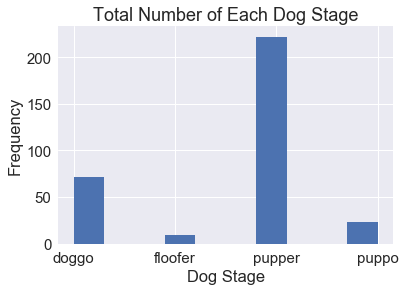

In [104]:
plt.hist(dog_stage['stage'])
plt.xlabel('Dog Stage')
plt.ylabel('Frequency')
plt.title('Total Number of Each Dog Stage')
plt.savefig('dog_stage_plot.png')

#### Visualization 2 - The favorite count by retweet count
* Here we can visualize the relationship between favorite_count and retweet_count.
* There are scatters showing a postive linear relationship between them.

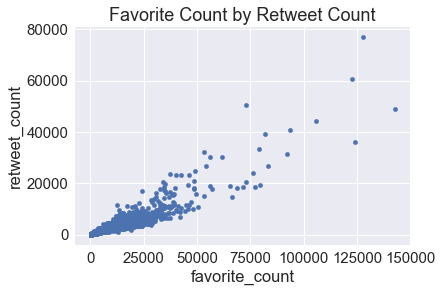

In [106]:
df.plot(x='favorite_count', y='retweet_count', title='Favorite Count by Retweet Count', kind='scatter');
plt.savefig('retweet_vs_favorite.png')

#### Visulization 3 - Top 10 favorit dogs by favorite count
* The top favorite dog names Jamesy and earned 124742 favorite counts

In [81]:
df_top10 = df[df['name'].notnull()]

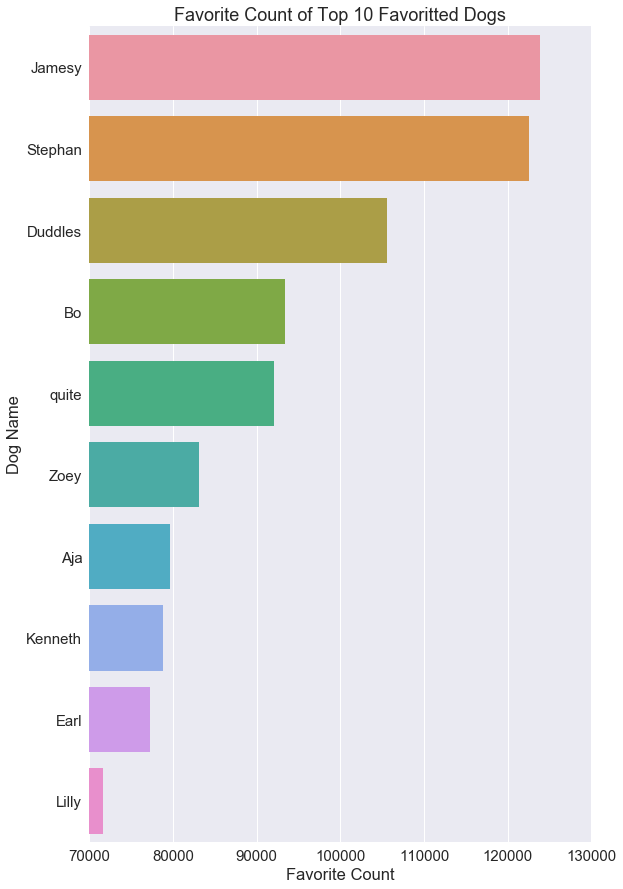

In [89]:
# Create a dataset that contains the top 10 favoritted dogs
df_top10 = df_top10.nlargest(10,'favorite_count')

#Plot the top favorited dogs
sns.set(style="darkgrid");
sns.set(font_scale=1.5);
f, ax = plt.subplots(figsize=(9, 15));
ax = sns.barplot(x='favorite_count', y='name', data=df_top10);

ax.set(xlim=(70000,130000), ylabel="Dog Name", xlabel="Favorite Count");
plt.title('Favorite Count of Top 10 Favoritted Dogs');

#### Insight 1 - Highest rated dog

In [75]:
df.nlargest(1,'rating')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,stage,favorite_count,retweet_count,rating
762,749981277374128128,NaN,NaN,2016-07-04 15:00:45,https://about.twitter.com,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,Atticus,None,5493.0,2697.0,177.6


Tweet with Hight rating winner[749981277374128128](https://twitter.com/dog_rates/status/749981277374128128):
![Winner](https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg)

#### Insight 2 - Lowest rated dog

In [80]:
df.nsmallest(1,'rating')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,stage,favorite_count,retweet_count,rating
247,835152434251116546,NaN,NaN,2017-02-24 15:40:31,http://twitter.com,When you're so blinded by your systematic plag...,https://twitter.com/dog_rates/status/835152434...,NaN,None,23967.0,3325.0,0.0


Tweet with lowest rating[835152434251116546](https://twitter.com/dog_rates/status/835152434251116546)
![Lowest rating](https://pbs.twimg.com/media/C5cOtWXXEAUb9uj.jpg)

#### Summary storing,insight and visualization data:
* Store the clean data frame in a CSV file with the mian one named twitter_archive_master.csv.
* There are 3 visualizations and 2 insights which are showed total number of each dog stage,favorite count by retweet count and Top 10 favorite dogs by favorite count,Highest and lowest rated dog.


### <a name="ref"> References </a>

1. [Twitter application Management](https://apps.twitter.com/)
2. [Pandas DataFrame Merge](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html)
3. [Matplotlib](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)